# Optical Character Recognition (OCR)

## Learning objectives
* understanding the idea behind OCR

## Key terms:
* OCR
* Automatic Image Processing
* Text Recognition
* Performance Evaluation

## Theoretical aspects

Optical Character Recognition (OCR) is a technology that enables computers to read text from images. OCR tools have become increasingly popular due to their ability to automate data entry and extract information from scanned documents. 
To perform OCR, we need to understand the theoretical aspects of the technology. Here are some key points to consider:

OCR: Optical Character Recognition (OCR) is a technology that converts images of text into machine-readable text. It involves the recognition and extraction of characters from scanned documents or images.

Automatic Image Processing: OCR relies on automatic image processing techniques to enhance the quality of the input image. This includes tasks such as noise reduction, image binarization, and image segmentation.

## Examples

### Prerequisites


1. Create an Azure subscription [more details](https://azure.microsoft.com/en-gb/free/ai-services/)

2. Create a Vision resource 
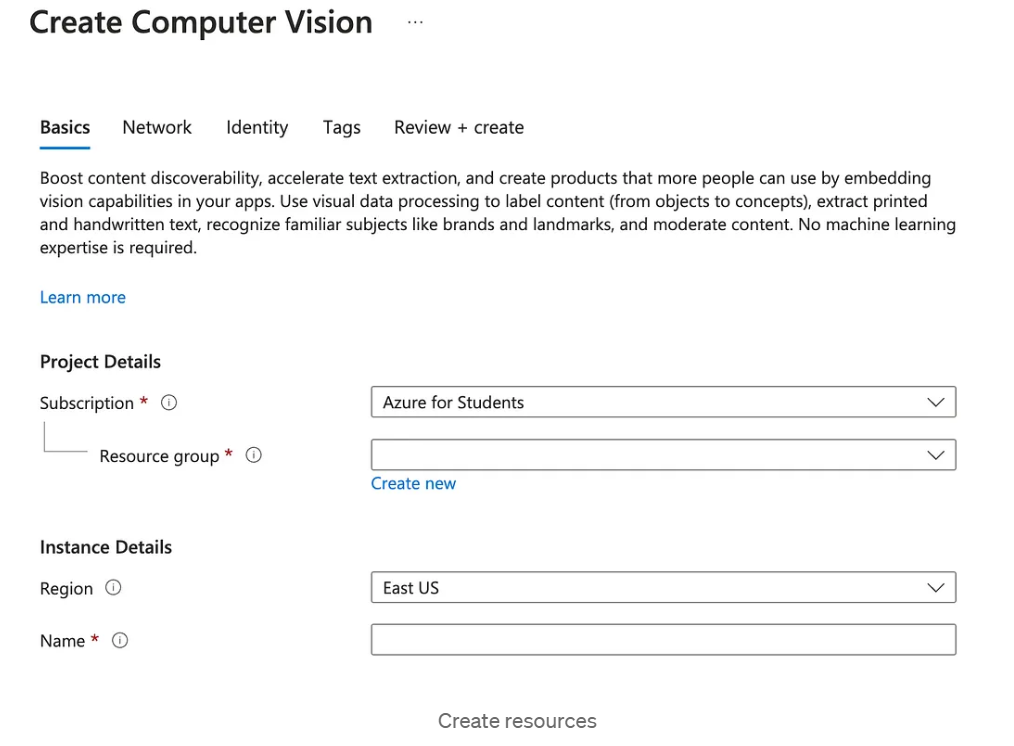

3. Save the key and endpoint
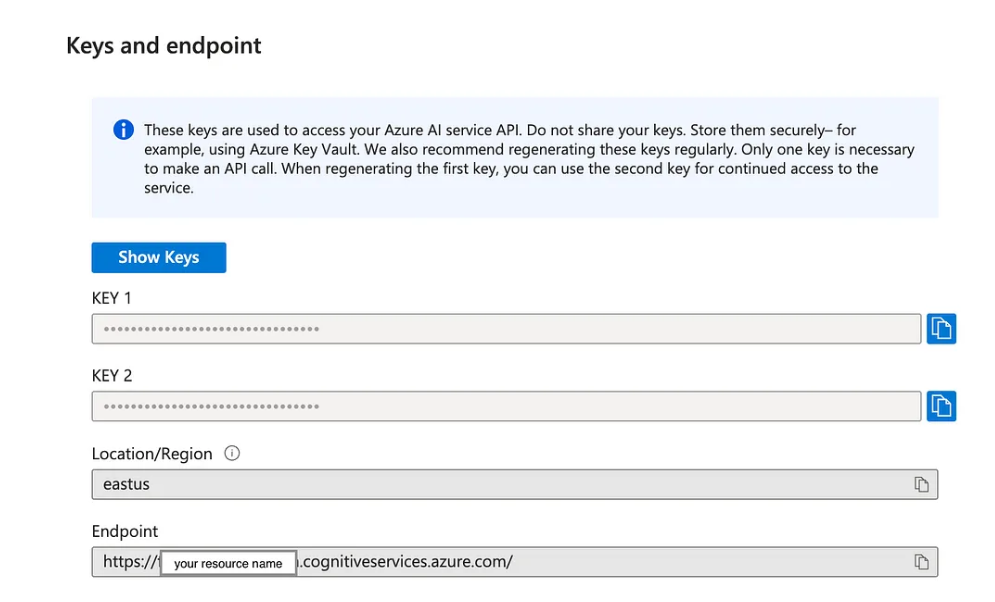

4. Install packages


In [ ]:
pip install azure-cognitiveservices-vision-computervision
pip install pillow

### Processing

5. Authenticate credentials and create a client

In [2]:
from azure.cognitiveservices.vision.computervision import ComputerVisionClient
from azure.cognitiveservices.vision.computervision.models import OperationStatusCodes
from azure.cognitiveservices.vision.computervision.models import VisualFeatureTypes
from msrest.authentication import CognitiveServicesCredentials
from array import array
import os
from PIL import Image
import sys
import time

In [7]:
'''
Authenticate
Authenticates your credentials and creates a client.
'''
subscription_key = os.environ["VISION_KEY"]
endpoint = os.environ["VISION_ENDPOINT"]
computervision_client = ComputerVisionClient(endpoint, CognitiveServicesCredentials(subscription_key))
'''
END - Authenticate
'''

'\nEND - Authenticate\n'

6. Process the image

In [8]:
img = open("test1.png", "rb")
# img = open("test2.jpeg", "rb")
read_response = computervision_client.read_in_stream(
    image=img,
    mode="Printed",
    raw=True
)
operation_id = read_response.headers['Operation-Location'].split('/')[-1]
while True:
    read_result = computervision_client.get_read_result(operation_id)
    if read_result.status not in ['notStarted', 'running']:
        break
    time.sleep(1)

# Print the detected text, line by line
result = []
if read_result.status == OperationStatusCodes.succeeded:
    for text_result in read_result.analyze_result.read_results:
        for line in text_result.lines:
            print(line.text)
            result.append(line.text)

print()

Google Cloud
Platform



7. Evaluate the output

In [9]:
# get/define the ground truth
groundTruth = ["Google Cloud", "Platform"]
# groundTruth = ["Succes in rezolvarea", "tEMELOR la", "LABORAtoaree de", "Inteligenta Artificiala!"]

# compute the performance
noOfCorrectLines = sum(i == j for i, j in zip(result, groundTruth))
print(noOfCorrectLines)

2
